# FastAPI

* Assim como o Django e Flask o FastAPI é um framework back-end

## Instalar o FastAPI

* Você pode acessar o guia do usuário em: https://fastapi.tiangolo.com/tutorial/

* Para instala-lo precisaremos digitar o seguinte comando no terminal:

<code>pip install fastapi</code>

Além disso é fortemente recomendado que instalemos o uvicorn(que trabalhará como um servidor), da seguinte maneira:

<code>pip install uvicorn</code>

* Para iniciar nosso projeto NÃO PRECISAREMOS ter um end-point para cada restaurante


# Criando um endpoint

Primeiramente vamos criar um arquivo "main.py" apenas para diferenciar do "app.py"

e iremos inserir nele:

In [ ]:
from fastapi import FastAPI
app = FastAPI()

@app.get('/api/hello')
def hello_world():
    return {'Hello':'World'}

Apos inserir os dados a cima no arquivo "main" devemos estar dentro do diretório do arquivo main (no terminal, se preciso navegue até la com o comando <code>CD nomePasta</code>)

Em seguida digite no terminal :<code>uvicorn main:app --reload </code>

Após isso o terminal mostrará inumeras informações, inclusive o end-point (o endereço local-host )

Ao entrar no link, vc verá que surgiu um erro e que nada foi encontrado, para sanar isto, basta adicionaro end-point criado no final do endereço, por exemplo:

<code>/api/hello</code>

Exatamente como indicamos no arquivo "main.py"

# Criando um end-point que consulta cardapio restaurante

Para isso, apos a instalaçaõ do uvicorn e do fastapi, criaremos um novo end point, este será chamado de restaurantes.

Além disso usaremos tbm a classe Query, por tanto precisamos adiciona-la as importações com:

<code>from fastapi import FastAPI,Query
import requests</code>

Nesta classe Query, precisamos apontar seu tipo (similar ao java, da seguinte maneira):

<code>@app.get('/api/restaurantes/')
def get_restaurantes(restaurante: str = Query(None))</code>

Pos isso, iremos armazenar o endereço em uma URL, como ja vimos anteriormente

Em seguida atribuiremos o request.get(url) da url

Novamente analisando se o status_code será 200, e caso seja faremos o seguinte:

* se o status_code for == 200
* Armazene o response, em formato json na variavel json
* Se o restaurante for None, se não for exebiremos tudo
* Retorne os Dados em formato json


In [ ]:
@app.get('/api/restaurantes/')
def get_restaurantes(restaurante: str = Query(None)):
    # Armazenando a url em uma variavel
    url = 'https://guilhermeonrails.github.io/api-restaurantes/restaurantes.json'

    #Solicitando que pegue a variavel url
    response = requests.get(url)

    #Criamos uma condicional, se caso der 200 traga as infos com response.json
    if response.status_code == 200:
        dados_json = response.json()

        # Se retaurante for nenhum da nossa lista, retorne a lista toda do json
        if restaurante is None:
            return {f'Dados' : dados_json}

        #Criamos um dicionário vazio que receberá todos restaurantes
        dados_restaurante = []
        for item in dados_json:
            if item['Company'] == restaurante:

                #Adicionando os dados do restaurante, no restaurante de nome tal
                dados_restaurante.append({
                    "item":item['Item'],
                    "price": item['price'],
                    "description" : item['description']
                })  
        return {'Restaurante' : restaurante, 'Cardapio' : dados_restaurante}      
    else:
        return{f'Erro' : f'{response.status_code} - {response.text}'}

## Para rodar a aplicação

Certifique-se que esta com o venv ativo, se não estive ative da seguinte maneira:

<code>venv\Scripts\activate.bat</code>

Faça tambem o reload do uvicorn, da seguinte maneira

<code>uvicorin main:app --reload</code>

E acesse o http que surgir.. notará que exibirá not found, pois não acessamos o end point corretamente, como apostamos "api/restaurantes", por tanto adicione no endereço, fazendo isso vc tera acesso ao conteudo json, dos restaurantes

# Filtrando por restaurante 

Para filtrar podemos simplesmente alterar o endereço da url, adicionando :

<code>?restaurante=KFC</code>

Com isso a API considerará apenas o restaurantes na qual restaurante seja igual a KFC

## Visualizando todos end-points criado com a FastAPI

Para isso é simples, basta adicionar ao endereço <code>/docs</code>

ou seja o endereço ficaria desta maneira:

<code>http://127.0.0.1:8000/docs</code>

e nos apresentaria todos os end-points do sistema, como mostra imagem a seguir:

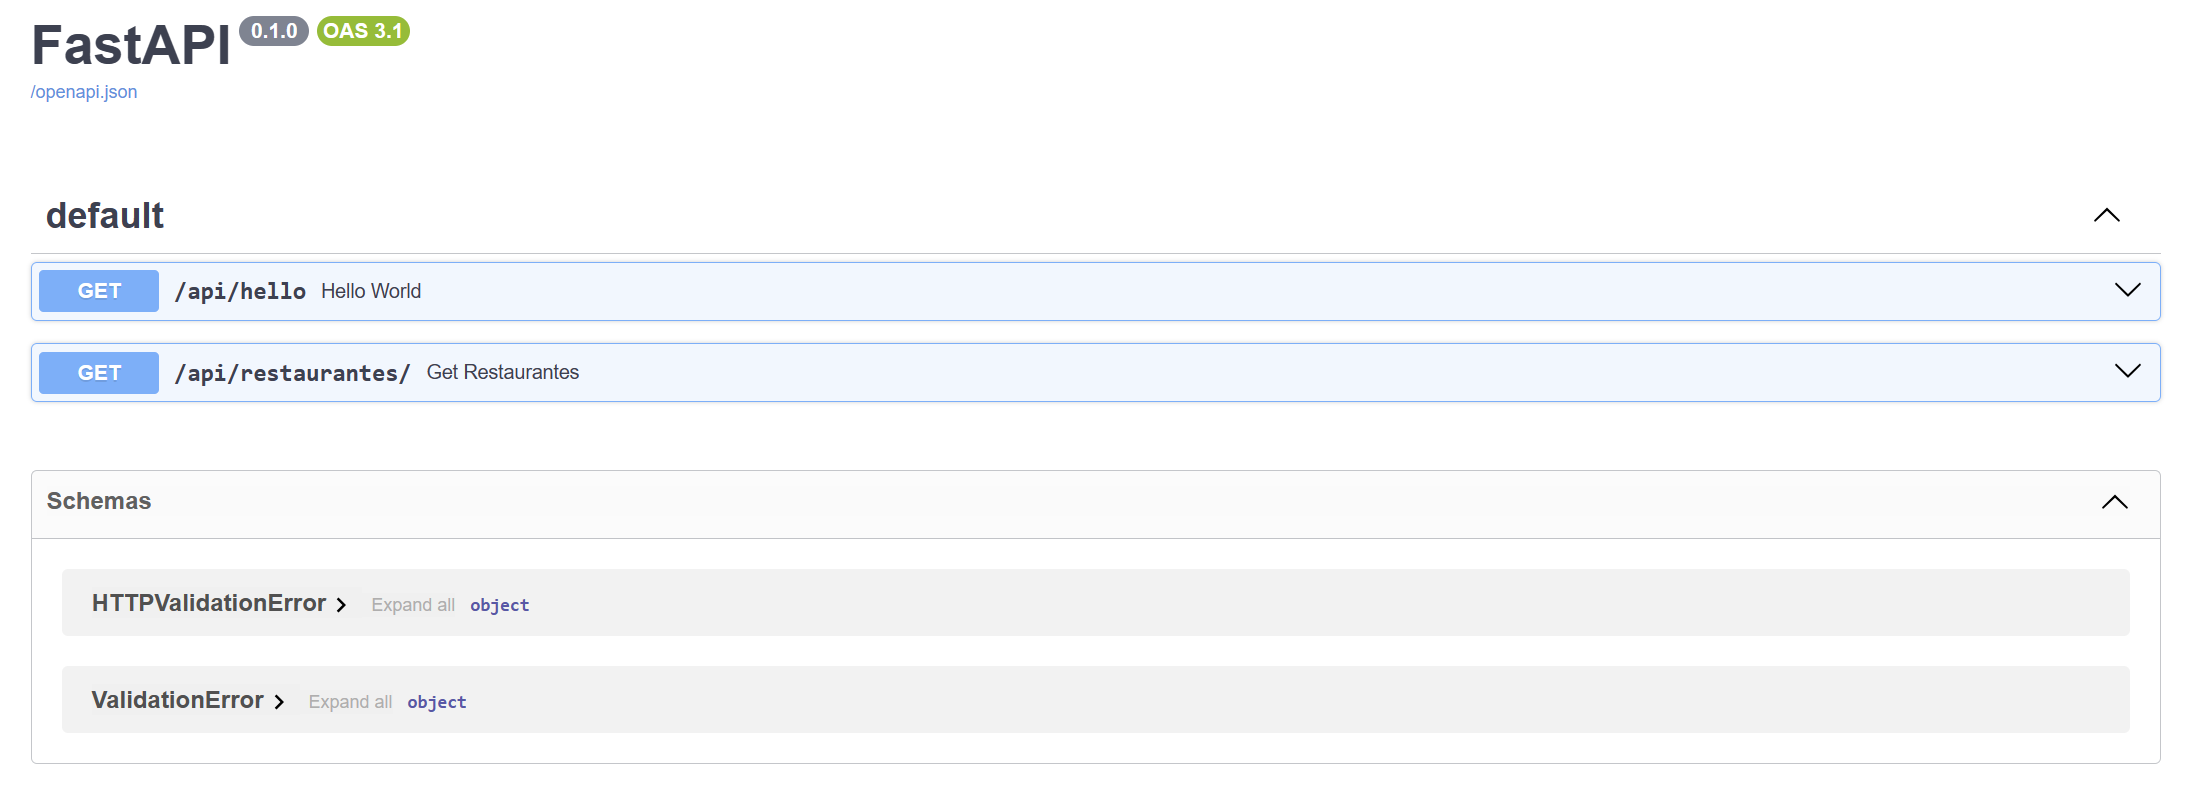



Para melhor documentar esse "/docs" podemos fazer o docString no arquivo da seguinte maneira (como ja vimos):

In [ ]:
@app.get('/api/hello')
def hello_world():
    '''
    Endpoint que exibe uma mensagem incrivel do mundo da programação
    '''
    return {'Hello':'World'}


@app.get('/api/restaurantes/')
def get_restaurantes(restaurante: str = Query(None)):
    '''
    Endpoint para visualizar os cardapios dos restaurantes
    '''

    ......

E ao clicar no endpoint, olha o resultado com docString:

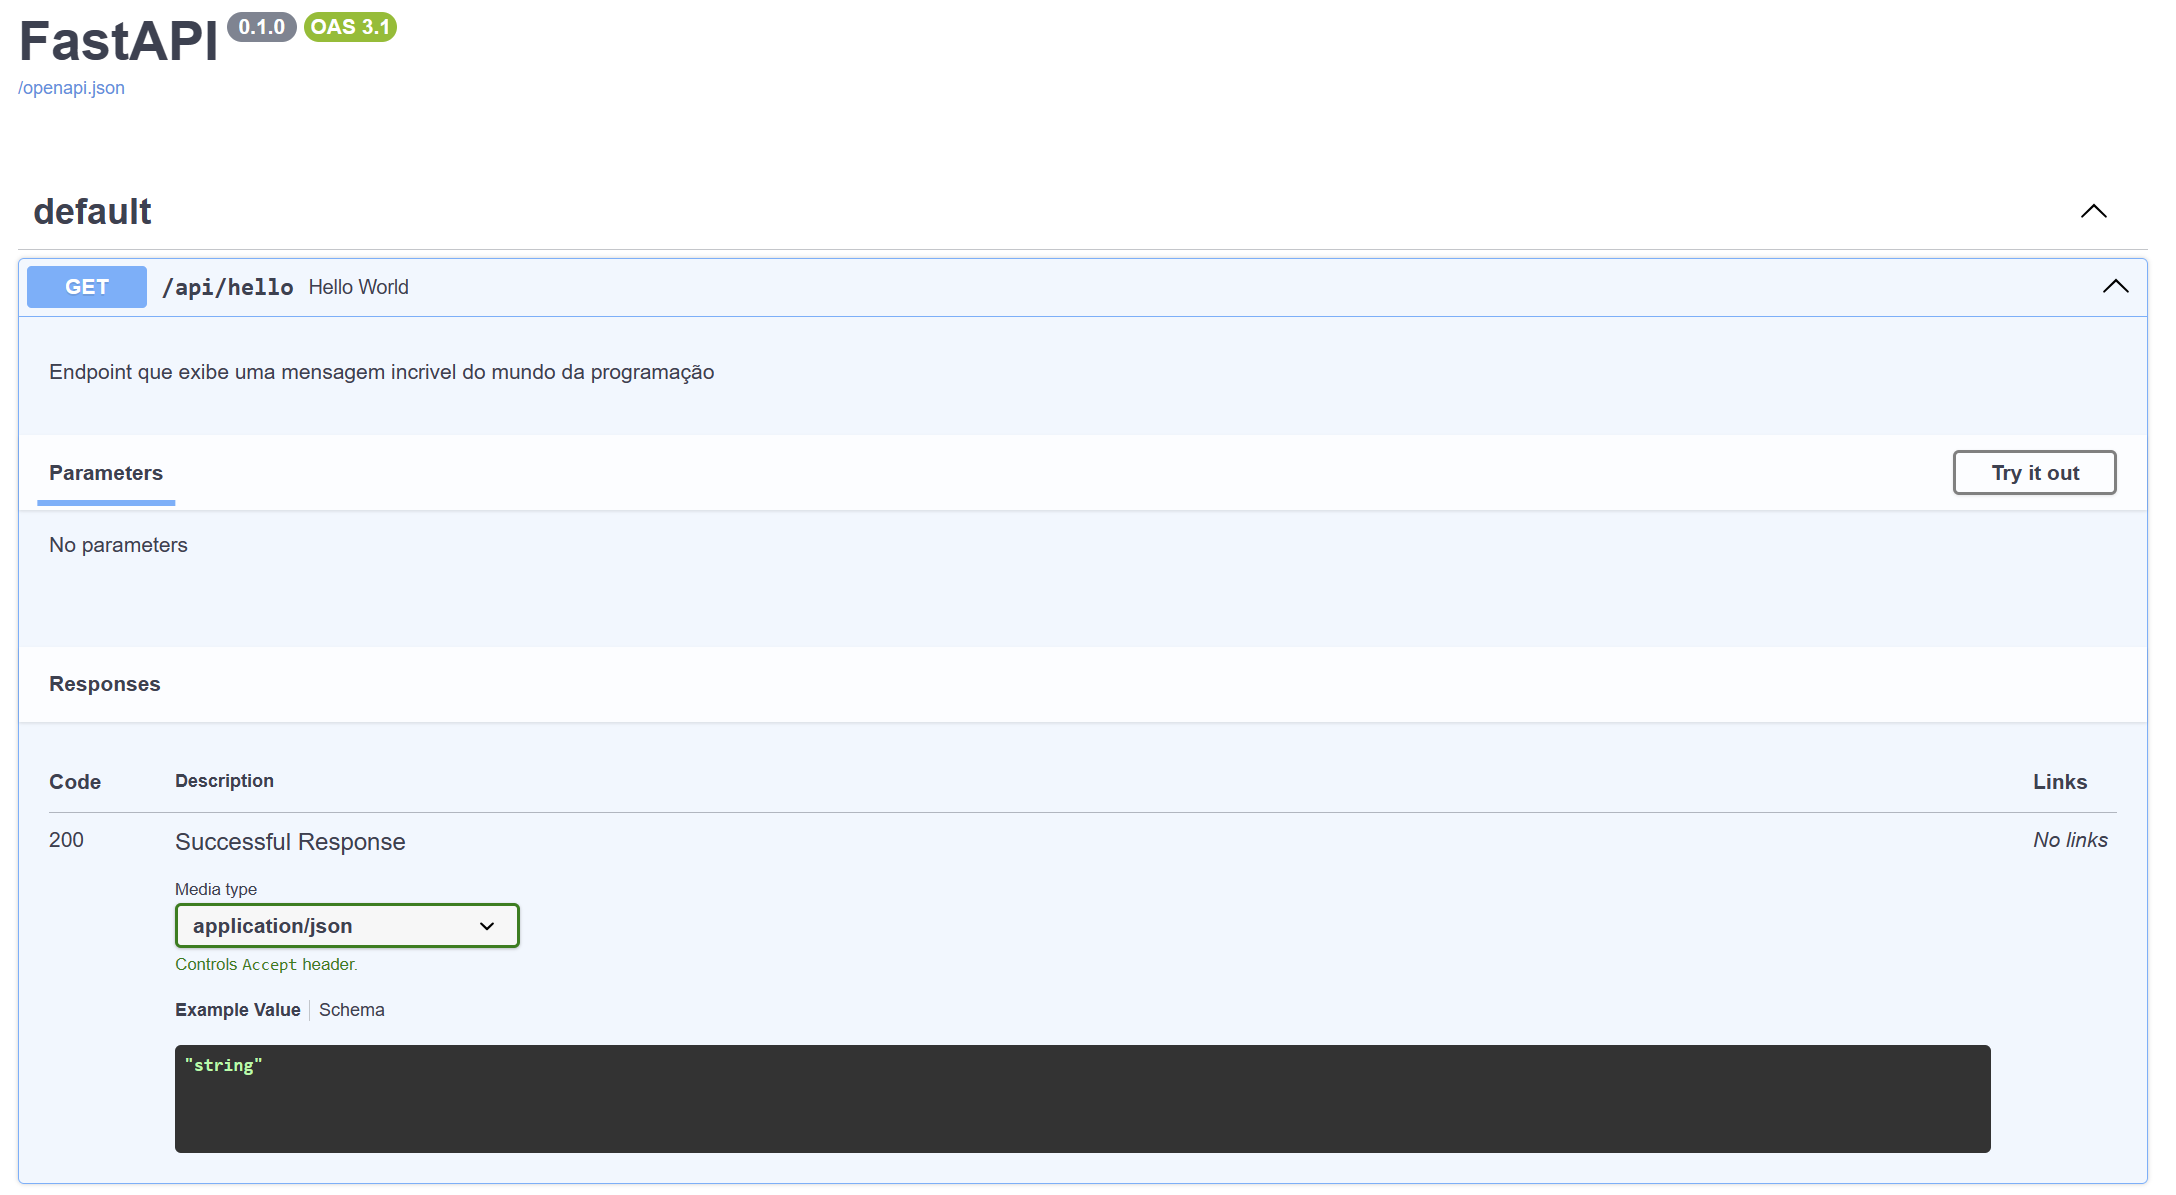

É possivel até mesmo teste o endPoint, clicando no botão "Try it out" e no caso do restaurante, passar o parametro de restaurante e clicar em "execute":

Onde ele nos trará também a resposta!

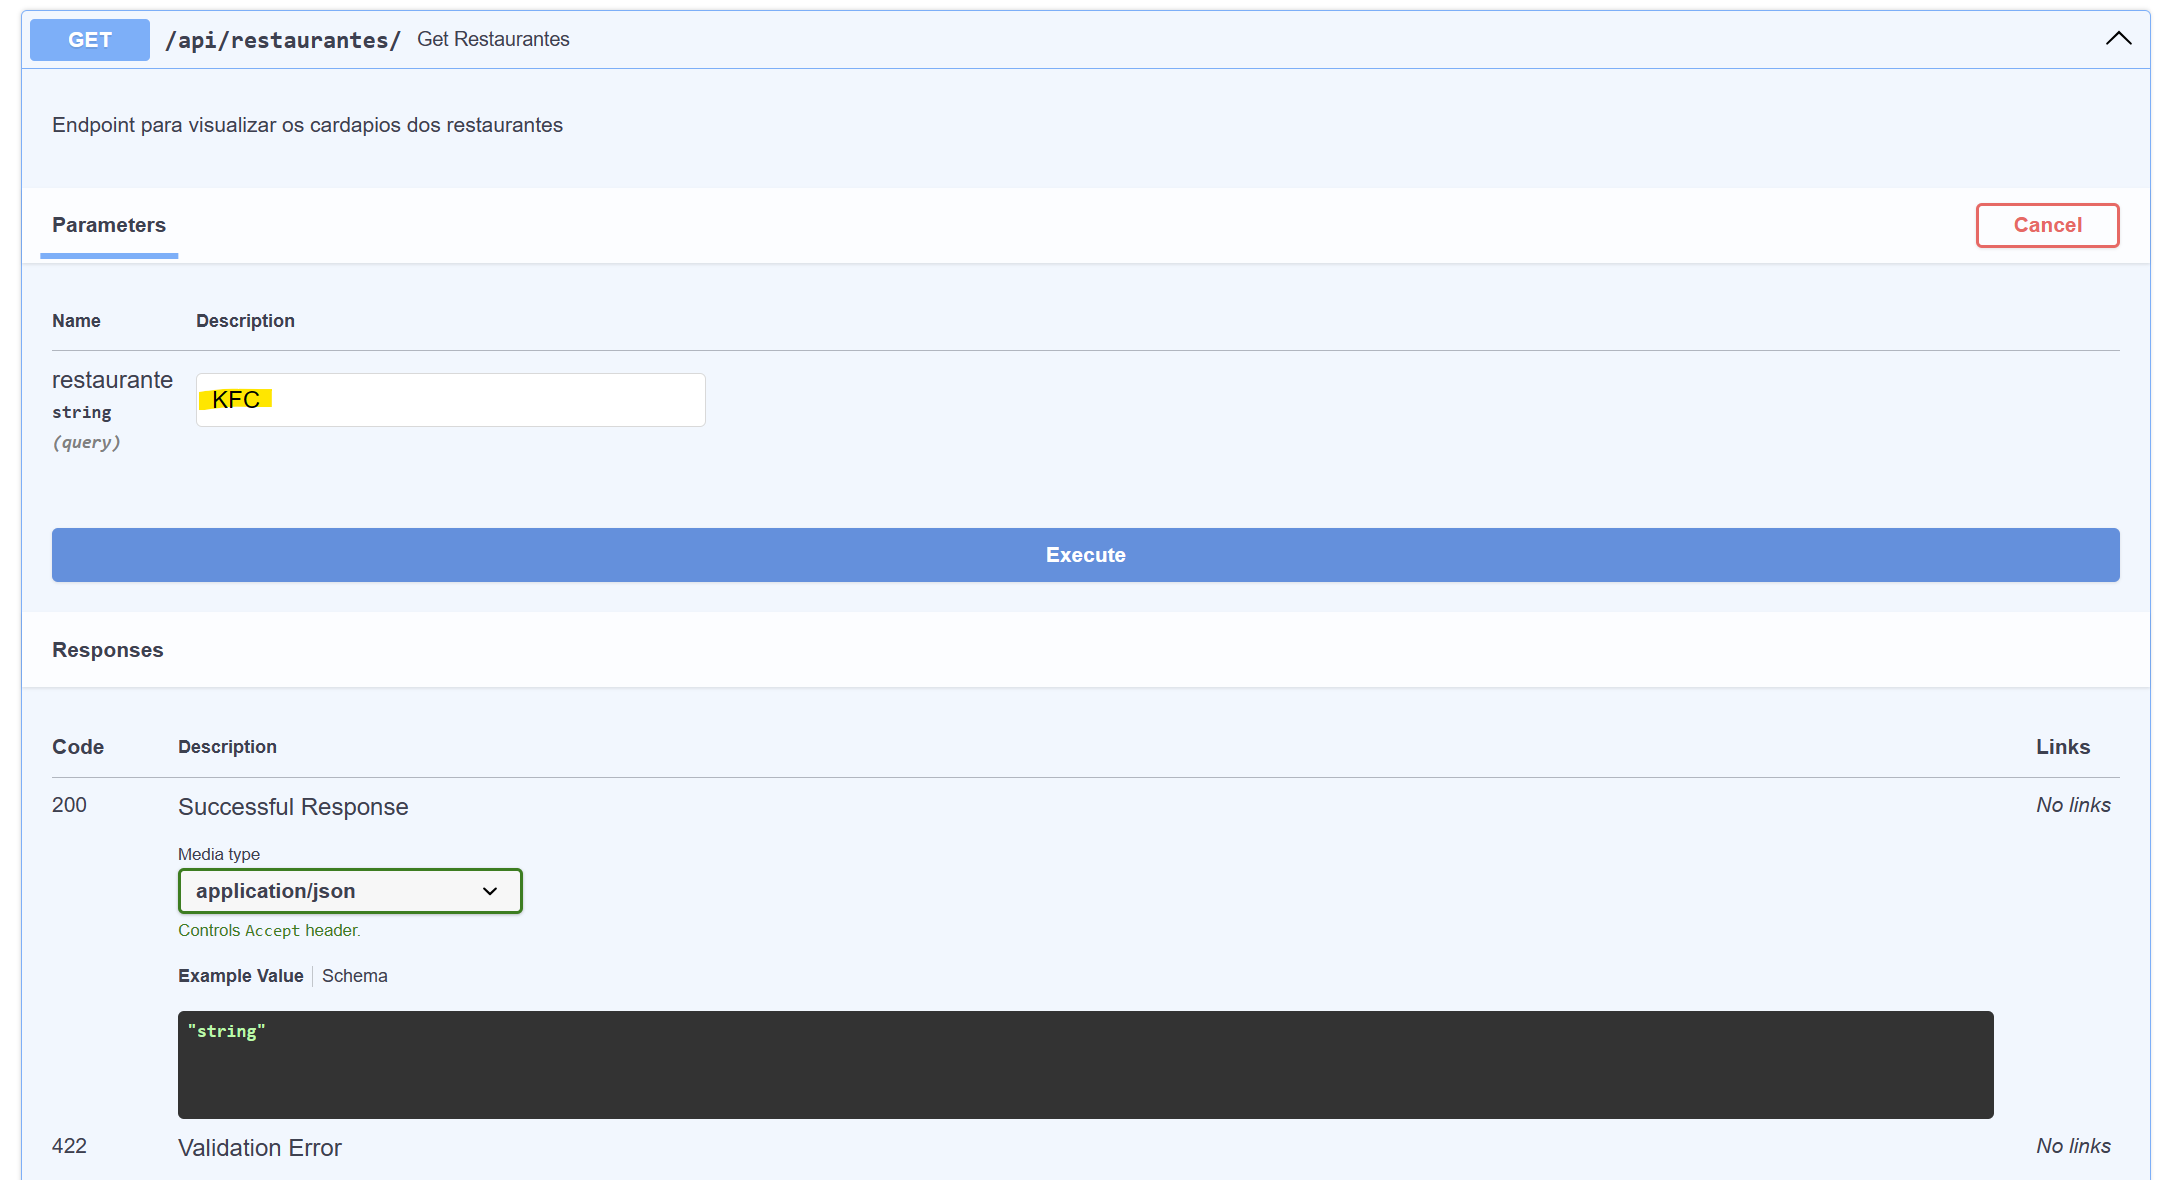

# Diferentes frameeworks para Python

## Flask: Simplicidade e Flexibilidade

É uma escolha popular para projetos menores ou para desenvolvedores que preferem ter mais controle sobre os componentes que utilizam
Com o Flask, você pode rapidamente criar uma API básica com poucas linhas de código, sendo uma excelente opção para prototipagem rápida, como mostrado no código a seguir:

In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route('/api')
def ola_mundo():
    return 'Olá Mundo!'

if __name__ == '__main__':
    app.run()


## Djando: Estrutura Poderosa e Convenções Batteries-Included

É uma escolha robusta para projetos mais  complexos e de maior escala

Fornece uma estrutura completa que inclui um sistema de administraação, ORM (Object-Relational Mapping) e muitos outros recursos

Apesar de ser um frameworkd mais pesado em comparação com flask, o Django oferece um solução mais abrangente para desenvolvimento web.

Um exemplo de como criar uma API simples em Django está no código abaixo:


In [ ]:
from django.http import JsonResponse
from django.views import View

class MinhaAPI(View):
    def get(self, request):
        return JsonResponse({'message': 'Olá mundo!'})

## FastApi : Alta Performance e Documentaçao Automática

Como vimos o FastAPI é uma escolha moderna, otimizada para alta performance e fácil utilização

Ele utiliza a tipagem de dados do Python 3.7+ para oferecer uma documentação automática excepcional, facilitando a compreensão e utilização da API:

In [ ]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/api")
def ola_mundo():
    return {"message": "Olá Mundo!"}


Indenpendente de escolha entre Django, Flask ou FastAPI, o importante é considerar os requisitos específicos do projeto, a experiência da equipe de desenvolvimento e as características desejadas na API. 
Cada framework tem seus pontos fortes, e a seleção depende das necessidades particulares das pessoas desenvolvedoras e do contexto do projeto

# Proximos passo em PyTHON

Aprendemos até o momento:

* Fundamentos da linguagem
* Funções
* Classes
* Orientação a objetos
* Incio em FastAPI


## Decidir o frameworkd

Precisamos decidir entre Django, Flask e FastAPI:

Onde:

|Django *                                      | Flask                                                           | FastAPI                            |
|---------------------------------------------|-----------------------------------------------------------------|------------------------------------|
| É o mais comum e mais antigo no mundo Python|Feita propriamente API (Pórem vem sendo substituia pelo FastAPI) | É mais nova e atualmente utilizada |
| Tem maior uso , porém é mais complexo| | É mais simples e recomendada para iniciantes e lhe dara tudo de maneira visivel| 

# Participar de uma comunidade Python

Python tem algumas conferencias a respeito:

- Python Nordeste
- Python Sul
- Python Sudeste
- Python Norte

Conferencia Nacional:

- Python Brasil

Conferencia Django:

- Djangocon

FastAPI tem uma comunidade muito ativa e um discord onde discutem sobre o framework
Flask não tem comunidade muito ativa

# Resumidamente

Foque em um frameeork



